# Bank Marketing
- 수치형 변수 분석   
김승민   
이승훈
- 범주형 변수 분석   
안호준   
변은성


## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns

SEED = 42

## 데이터 불러오기

In [2]:
bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SKT FLY AI/mini_project_02/bank-full.csv',sep=';')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df = bank.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### 범주형 변수

In [7]:
col_category = list(df.select_dtypes(include=['object']).columns)
col_category

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [8]:
df[col_category].head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


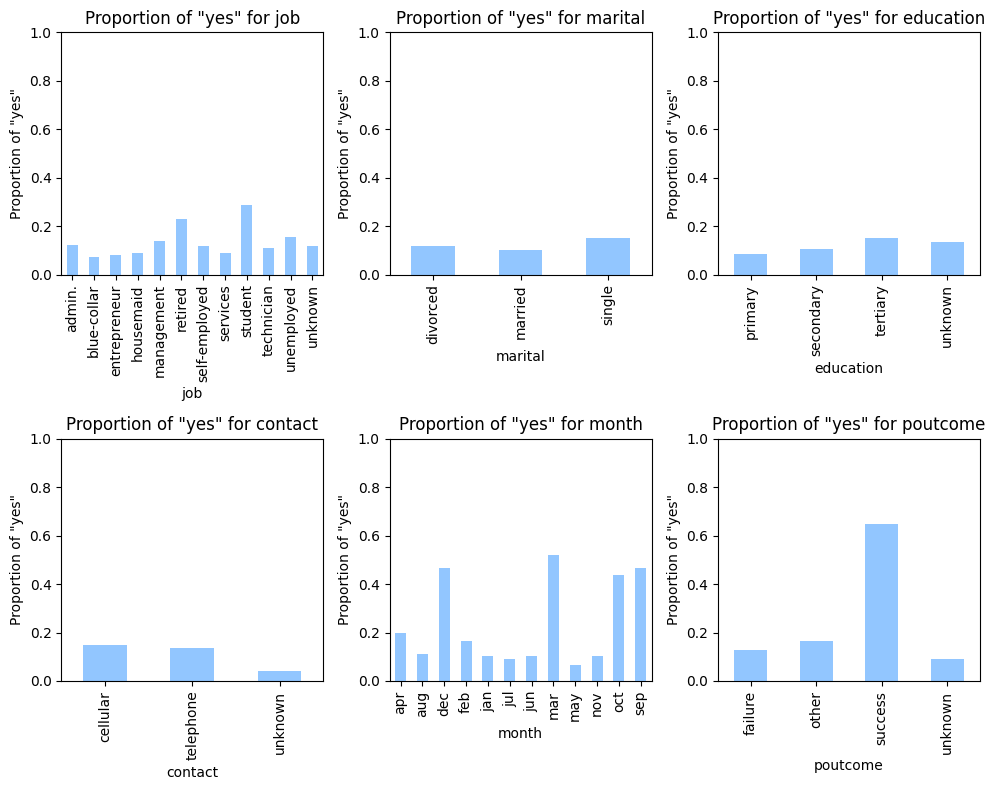

In [9]:
import matplotlib.pyplot as plt

data = df.copy()
# List of columns to analyze
columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Calculate the proportion of 'yes' for each value in the specified columns
yes_proportions = {}
for col in columns:
    yes_proportions[col] = data[data['y'] == 'yes'][col].value_counts() / data[col].value_counts()

# Plotting the proportions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
    proportions = yes_proportions[col].sort_index()
    proportions.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Proportion of "yes" for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion of "yes"')
    axes[i].set_ylim(0, 1)  # Setting y-axis limits to be between 0 and 1

plt.tight_layout()
plt.show()


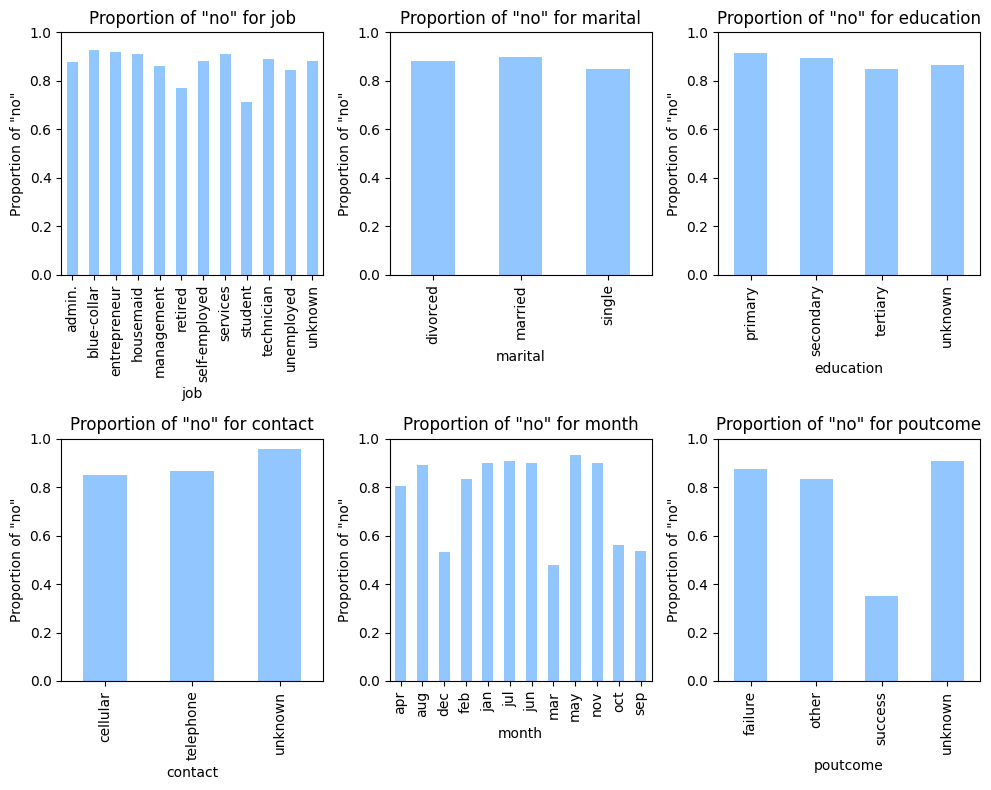

In [10]:
import matplotlib.pyplot as plt

data = df.copy()
# List of columns to analyze
columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Calculate the proportion of 'yes' for each value in the specified columns
yes_proportions = {}
for col in columns:
    yes_proportions[col] = data[data['y'] == 'no'][col].value_counts() / data[col].value_counts()

# Plotting the proportions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
    proportions = yes_proportions[col].sort_index()
    proportions.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Proportion of "no" for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion of "no"')
    axes[i].set_ylim(0, 1)  # Setting y-axis limits to be between 0 and 1

plt.tight_layout()
plt.show()


- job : 은퇴나 학생이 높은 값
- 결혼 여부가 y값에 영향이 작다
- 특정 월에 가입 수가 많다
- poutcome : 재가입률이 높다

### 연속형 변수

In [11]:
col_num = list(df.select_dtypes(include=['number']).columns)
col_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

- age : 나이
- balance : 평균 연간 수입
- day : 마지막 contect 날짜
- duration : 마지막 접촉 기간(초)
- campaign : 캠페인기간 동안 접촉 수
- pdays : 이전 캠페인에서 접촉하고 경과한 일수. -1은 연락 안됨
- previous : 이 캠페인 이전 이 고객에 수행된 컨택 수

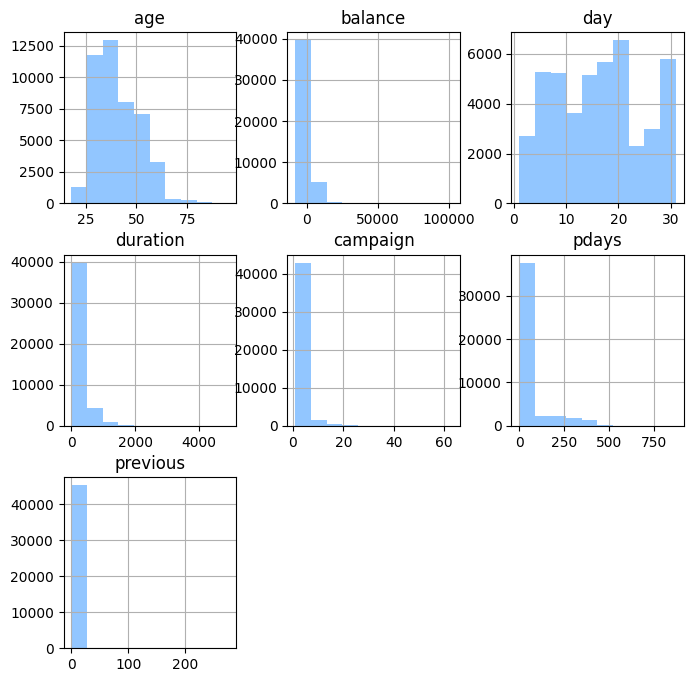

In [12]:
df[col_num].hist(figsize=(8,8))
plt.show()

In [13]:
col_num = df.select_dtypes(include=['number']) # 숫자형 컬럼만 뽑기
col_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [14]:
num = df[['balance','campaign','pdays','duration','previous']]

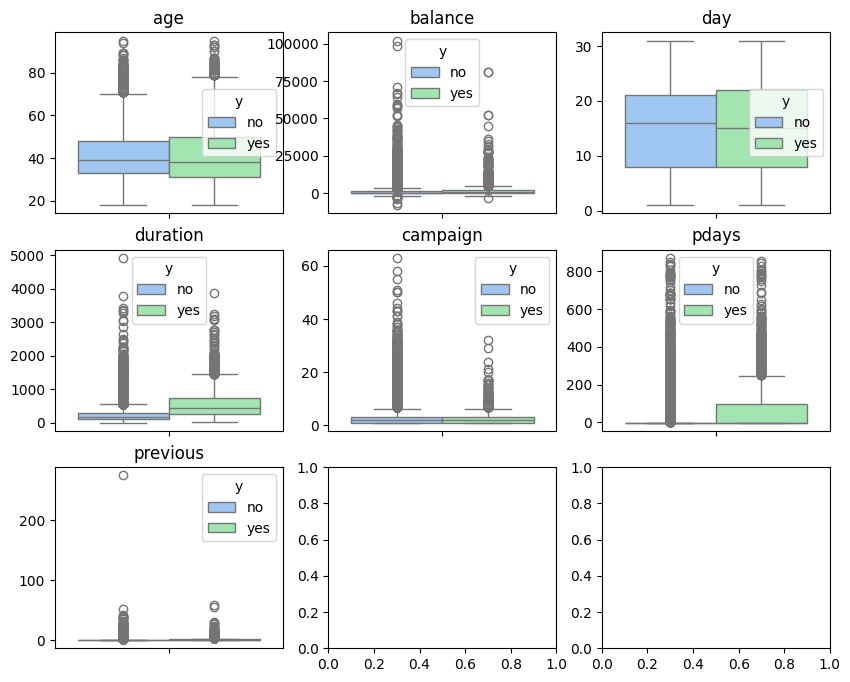

In [15]:
fig, axes = plt.subplots(3,3, figsize=(10,8))
axes = axes.flatten()

for i, col in enumerate(col_num.columns):
     sns.boxplot(y=col, data=col_num, ax=axes[i], hue=df['y'])
     axes[i].set_xlabel(None)
     axes[i].set_ylabel(None)
     axes[i].set_title(col)

<Axes: xlabel='balance', ylabel='Count'>

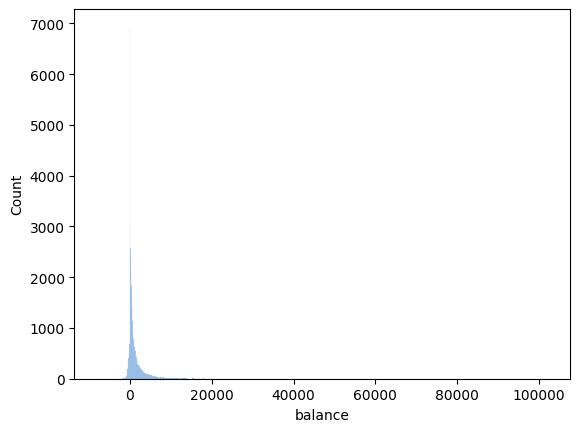

In [16]:
sns.histplot(col_num['balance'])

In [17]:
col_num['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [18]:
len(df[(df['pdays']==-1) & (df['y']=='no')])

33570

## 데이터 분리

In [19]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [20]:
df = df.drop(['marital','day'], axis=1)
df.head(2)

,age,job,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,no


In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=SEED, stratify=df['y'])
print(train.shape,test.shape)

(36168, 15) (9043, 15)


In [22]:
X_train = train.drop(['y'],axis=1)
y_train = train['y']

### 전처리

In [23]:
X_train['previous'].value_counts()

previous
0      29584
1       2232
2       1681
3        881
4        563
5        368
6        228
7        157
8        107
9         71
10        56
11        54
13        34
12        34
14        16
15        13
17        12
16        11
19         8
20         7
18         6
23         5
22         5
21         4
24         4
30         3
25         3
29         3
27         3
38         2
28         2
26         2
40         1
35         1
32         1
51         1
37         1
55         1
275        1
58         1
41         1
Name: count, dtype: int64

In [24]:
drop_idx = X_train[X_train['previous'] > 60].index
X_train = X_train.drop(drop_idx)
y_train = y_train.drop(drop_idx)

In [25]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = lb.fit_transform(X_train[col])

In [26]:
X_train.shape

(36167, 14)

In [27]:
X_train.head(5)

,age,job,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
24001,36,9,1,0,861,0,0,1,1,140,2,-1,0,3
43409,24,8,1,0,4126,0,0,0,0,907,4,185,7,0
20669,44,9,1,0,244,1,0,0,1,1735,4,-1,0,3
18810,48,10,1,0,0,0,0,1,5,35,11,-1,0,3
23130,38,9,1,0,257,0,0,0,1,57,10,-1,0,3


In [28]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s= rs.fit_transform(X_train)
X_train_s

array([[-2.00000000e-01,  8.33333333e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  6.66666667e-01,  0.00000000e+00, ...,
         1.86000000e+02,  7.00000000e+00, -3.00000000e+00],
       [ 3.33333333e-01,  8.33333333e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.00000000e-01, -5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.00000000e-01,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.40000000e+00, -6.66666667e-01,  2.00000000e+00, ...,
         3.12000000e+02,  8.00000000e+00, -3.00000000e+00]])

## 모델 학습 및 평가

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy : ', accuracy_score(y_true, y_pred))
    print('recall : ', recall_score(y_true, y_pred, average=aver))
    print('precision : ', precision_score(y_true, y_pred, average=aver))
    print('f1 : ', f1_score(y_true, y_pred, average=aver))
    print('-----'*11)
    cfm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize = (3,3))
    s = sns.heatmap(cfm, annot=True, fmt='d', cbar=False, cmap='Purples')
    s.set(xlabel='Predcition', ylabel='Actual')
    plt.show()

In [30]:
X_test = test.drop(['y'],axis=1)
y_test = test['y']

In [31]:
tmp = {'yes':1,'no':0}
y_test = y_test.map(tmp)
y_train = y_train.map(tmp)

In [32]:
y_test

1392     0
7518     0
12007    0
5536     0
29816    0
        ..
12636    0
13364    0
16102    0
42097    0
31033    0
Name: y, Length: 9043, dtype: int64

In [33]:
drop_idx = X_test[X_test['previous'] > 60].index
X_test = X_test.drop(drop_idx)

In [34]:
X_test

,age,job,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
1392,40,blue-collar,primary,no,640,yes,yes,unknown,may,347,2,-1,0,unknown
7518,44,technician,secondary,no,378,yes,no,unknown,may,203,2,-1,0,unknown
12007,31,services,secondary,no,356,yes,no,unknown,jun,228,5,-1,0,unknown
5536,36,blue-collar,primary,no,655,yes,no,unknown,may,153,4,-1,0,unknown
29816,34,services,secondary,no,1921,yes,no,cellular,feb,61,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12636,26,blue-collar,secondary,no,-333,no,yes,unknown,jul,692,1,-1,0,unknown
13364,49,services,secondary,no,884,yes,no,telephone,jul,201,3,-1,0,unknown
16102,32,entrepreneur,tertiary,no,964,yes,no,cellular,jul,370,2,-1,0,unknown
42097,20,student,primary,no,0,no,no,cellular,nov,69,4,182,4,failure


In [35]:
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = lb.fit_transform(X_test[col])

In [36]:
X_test_s= rs.transform(X_test)
X_test_s

array([[ 6.66666667e-02, -5.00000000e-01, -1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.33333333e-01,  8.33333333e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.33333333e-01,  5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-4.66666667e-01, -3.33333333e-01,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.26666667e+00,  6.66666667e-01, -1.00000000e+00, ...,
         1.83000000e+02,  4.00000000e+00, -3.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.10000000e+02,  1.00000000e+00, -3.00000000e+00]])

In [37]:
X_test_s.shape, y_test.shape

((9043, 14), (9043,))

In [38]:
y_train_e = y_train.to_numpy()
y_test_e = y_test.to_numpy()

In [39]:
X_train_s.shape, y_train_e.shape

((36167, 14), (36167,))

In [40]:
y_test_e

array([0, 0, 0, ..., 0, 0, 0])

### DecisionTree

accuracy :  0.9001437576025655
recall :  0.6798442377188798
precision :  0.7689872353232774
f1 :  0.7118595157635306
-------------------------------------------------------


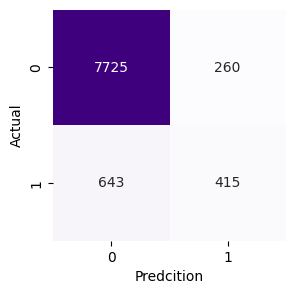

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=8, random_state=SEED)
clf.fit(X_train_s, y_train_e)
y_pred = clf.predict(X_test_s)
print_metrics(y_test_e, y_pred,'macro')

### RandomForest

accuracy :  0.9032400751962845
recall :  0.689387000436783
precision :  0.7794588165016951
f1 :  0.722226113043006
-------------------------------------------------------


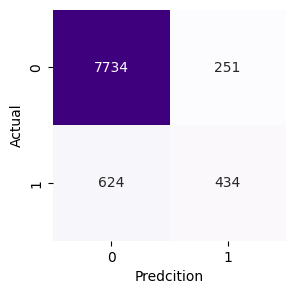

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf_r = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf_r.fit(X_train_s, y_train_e)
print_metrics(y_test_e,clf_r.predict(X_test_s),'macro')

### SVM

accuracy :  0.8824505142098861
recall :  0.5041966091904363
precision :  0.645640260935292
f1 :  0.4788753819577434
-------------------------------------------------------


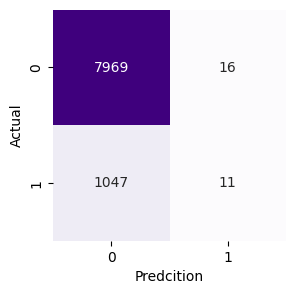

In [43]:
from sklearn.svm import SVC

clf_s = SVC(random_state=SEED)
clf_s.fit(X_train_s,y_train_e)
print_metrics(y_test_e,clf_s.predict(X_test_s),'macro')

### GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

prams_grid = {
    'n_estimators' : [50, 100, 150],
    'min_samples_split' : [1, 2, 4],
    'min_samples_leaf' : [1, 2, 4]
}

clf = RandomForestClassifier(n_estimators=100, random_state=SEED)
grid_search = GridSearchCV(clf,
                            param_grid = prams_grid,
                            cv=3,
                            n_jobs=-1,
                            refit=True,
                            return_train_score=True)

grid_search.fit(X_train_s,y_train_e)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

accuracy :  0.9029083268826716
recall :  0.3950850661625709
precision :  0.6371951219512195
f1 :  0.4877479579929988
-------------------------------------------------------


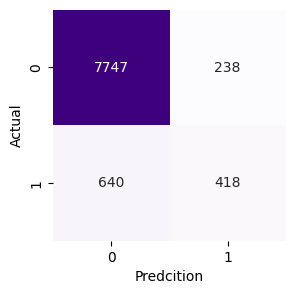

In [48]:
y_pred = grid_search.best_estimator_.predict(X_test_s)
print_metrics(y_test_e,y_pred)